In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import neural_network
import time
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)

## Data Creation

In [2]:
percentageTest = .2 # percentage of dataset to be designated as the test data

In [3]:
# Function to return gaussian data with given means, covariances, and number of points
# Returns 4 parameters: trainingData, testingData, trainingLabels, testingLabels
def generateGaussianData(mean1, mean2, cov1, cov2, pointsPerLabel):
    gauss1 = np.random.multivariate_normal(mean1, cov1, pointsPerLabel)
    labels1 = np.full(pointsPerLabel, -1, dtype=np.float64)
    gauss2 = np.random.multivariate_normal(mean2, cov2, pointsPerLabel)
    labels2 = np.full(pointsPerLabel, 1, dtype=np.float64)

    dataset = np.concatenate((gauss1, gauss2), axis=0)
    labels = np.concatenate((labels1, labels2), axis=0)
    
    plotRawData(dataset, labels)

    return train_test_split(dataset, labels, test_size=percentageTest, random_state=42)

In [4]:
def plotRawData(dataset, labels):
    granularityOfMesh = .02
    feature1 = dataset[:, 0]
    feature2 = dataset[:, 1]
    plt.scatter(feature1, feature2, c=labels, cmap=plt.cm.coolwarm, s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("Raw Data")

### Normal Gaussian 2 Clusters

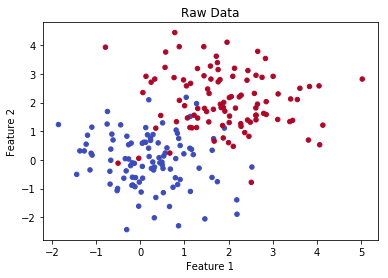

In [5]:
mean1 = [0,0]
mean2 = [2,2]
cov1 = [[1,0],[0,1]]
cov2 = [[1,0],[0,1]]
pointsPerLabel = 100

dataTrainGauss, dataTestGauss, labelsTrainGauss, labelsTestGauss = generateGaussianData(mean1, mean2, cov1, cov2, pointsPerLabel)

### 2 Correlated Clusters

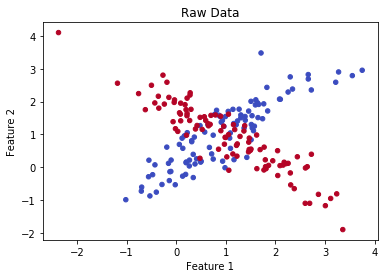

In [6]:
mean1 = [1,1]
mean2 = [1,1]
cov1 = [[1,.9],[.9,1]]
cov2 = [[1,-.9],[-.9,1]]
pointsPerLabel = 100

dataTrainCor, dataTestCor, labelsTrainCor, labelsTestCor = generateGaussianData(mean1, mean2, cov1, cov2, pointsPerLabel)

### Large dataset

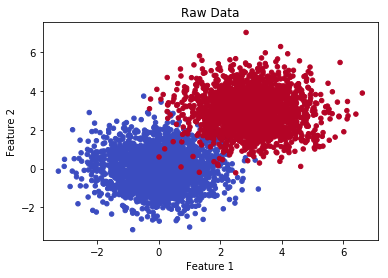

In [7]:
mean1 = [0,0]
mean2 = [3,3]
cov1 = [[1,0],[0,1]]
cov2 = [[1,0],[0,1]]
pointsPerLabel = 2000

dataTrainLarge, dataTestLarge, labelsTrainLarge, labelsTestLarge = generateGaussianData(mean1, mean2, cov1, cov2, pointsPerLabel)

# Plotting

In [8]:
def plotBoundary(model, data, labels):
    xCoord = data[:, 0]
    yCoord = data[:, 1]
    x_min, x_max = xCoord.min() - 1, xCoord.max() + 1
    y_min, y_max = yCoord.min() - 1, yCoord.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .05), np.arange(y_min, y_max, .05)) # Create x and y values on a grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # Convert 2 1-D arrays into (2 column) 2-D array to pass to predict
    Z = Z.reshape(xx.shape) # Back to a grid format so it can be plotted

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(xCoord, yCoord, c=labels, cmap=plt.cm.coolwarm, s=20)
    plt.axis([xx.min(), xx.max(), yy.min(), yy.max()])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("Boundary for Model")

# Timing/Accuracy

In [9]:
def fitModel(model, trainingData, trainingLabels):
    startTime = time.time()
    model.fit(trainingData, trainingLabels)
    endTime = time.time()
    print("Time to fit: " + str(endTime - startTime))

In [10]:
def predictModel(model, testData):
    startTime = time.time()
    predictions = model.predict(testData)
    endTime = time.time()
    print("Time to predict " + str(endTime - startTime))
    return predictions

In [11]:
def runOnModelAndData(model, dataTrain, dataTest, labelsTrain, labelsTest):
    fitModel(model, dataTrain, labelsTrain)
    predictions = predictModel(model, dataTest)
    accuracy = accuracy_score(labelsTest.tolist(), predictions)
    print(accuracy)
    plotBoundary(model, dataTrain, labelsTrain)

# Model Factories

In [12]:
def KNNModel():
    return neighbors.KNeighborsClassifier(algorithm='brute', weights='distance')

In [13]:
def NBModel():
    return naive_bayes.GaussianNB()

In [14]:
def SVMModel(modelType):
    if modelType == 'linear':
        return svm.SVC(kernel='linear')
    elif modelType == 'rbf':
        return svm.SVC(kernel='rbf', C=1000, gamma = 1)
    else:
        raise RuntimeError('Model must be of type linear or rbf')

In [15]:
def NNModel(modelType):
    if modelType == 'simple':
        return neural_network.MLPClassifier(hidden_layer_sizes=(10, 10))
    elif modelType == 'complex':
        return neural_network.MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), max_iter=2000)
    else:
        raise RuntimeError('Model must be of type simple or complex')

# KNN
### Euclidean distance, brute force method
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Time to fit: 0.0010006427764892578
Time to predict 0.0029952526092529297
0.975


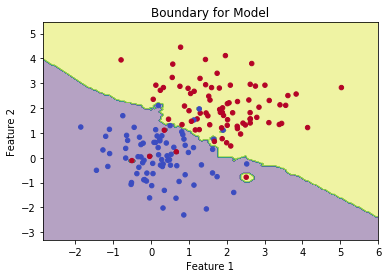

In [16]:
runOnModelAndData(KNNModel(), dataTrainGauss, dataTestGauss, labelsTrainGauss, labelsTestGauss)

Time to fit: 0.0004999637603759766
Time to predict 0.007505655288696289
0.825


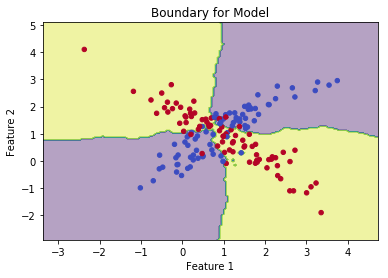

In [17]:
runOnModelAndData(KNNModel(), dataTrainCor, dataTestCor, labelsTrainCor, labelsTestCor)

Time to fit: 0.0010006427764892578
Time to predict 0.1992323398590088
0.9875


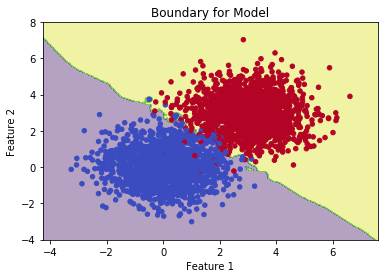

In [18]:
runOnModelAndData(KNNModel(), dataTrainLarge, dataTestLarge, labelsTrainLarge, labelsTestLarge)

# Naive Bayes
### Gaussian Assumption
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

Time to fit: 0.011013031005859375
Time to predict 0.0
0.975


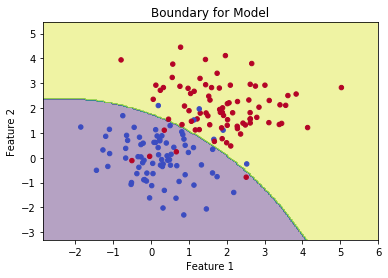

In [19]:
runOnModelAndData(NBModel(), dataTrainGauss, dataTestGauss, labelsTrainGauss, labelsTestGauss)

Time to fit: 0.002010345458984375
Time to predict 0.0
0.425


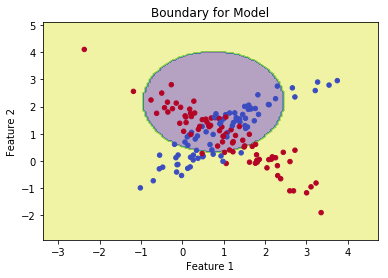

In [20]:
runOnModelAndData(NBModel(), dataTrainCor, dataTestCor, labelsTrainCor, labelsTestCor)

Time to fit: 0.0030019283294677734
Time to predict 0.0010027885437011719
0.98875


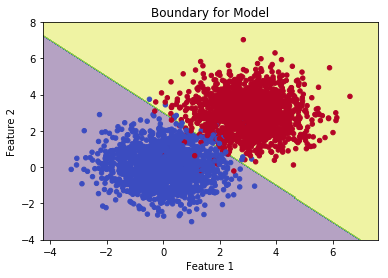

In [21]:
runOnModelAndData(NBModel(), dataTrainLarge, dataTestLarge, labelsTrainLarge, labelsTestLarge)

# Support Vector Machines
### Linear Kernel
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

Time to fit: 0.0030024051666259766
Time to predict 0.0010004043579101562
0.975


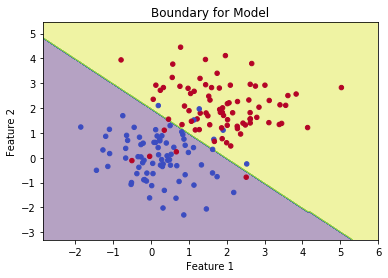

In [22]:
runOnModelAndData(SVMModel("linear"), dataTrainGauss, dataTestGauss, labelsTrainGauss, labelsTestGauss)

Time to fit: 0.002002239227294922
Time to predict 0.0
0.475


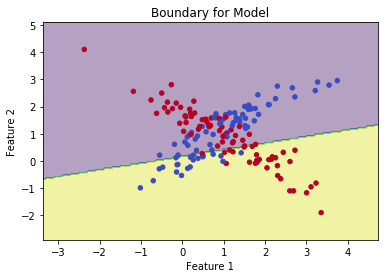

In [23]:
runOnModelAndData(SVMModel("linear"), dataTrainCor, dataTestCor, labelsTrainCor, labelsTestCor)

Time to fit: 0.045537471771240234
Time to predict 0.0030012130737304688
0.99


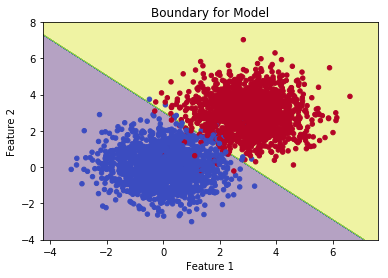

In [24]:
runOnModelAndData(SVMModel("linear"), dataTrainLarge, dataTestLarge, labelsTrainLarge, labelsTestLarge)

### RBF Kernel

Time to fit: 0.017011404037475586
Time to predict 0.0
0.95


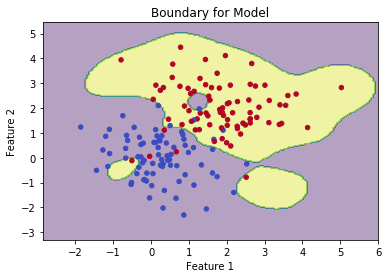

In [25]:
runOnModelAndData(SVMModel("rbf"), dataTrainGauss, dataTestGauss, labelsTrainGauss, labelsTestGauss)

Time to fit: 0.011514663696289062
Time to predict 0.0004968643188476562
0.825


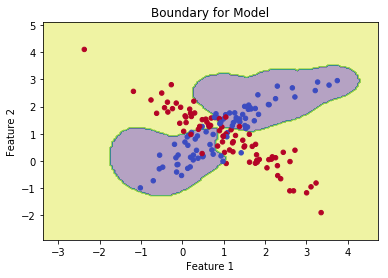

In [26]:
runOnModelAndData(SVMModel("rbf"), dataTrainCor, dataTestCor, labelsTrainCor, labelsTestCor)

Time to fit: 1.3521630764007568
Time to predict 0.008009910583496094
0.98875


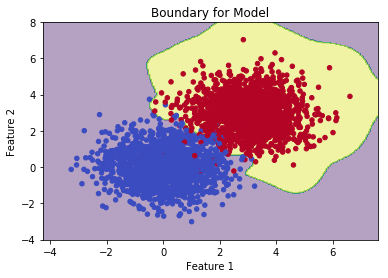

In [27]:
runOnModelAndData(SVMModel("rbf"), dataTrainLarge, dataTestLarge, labelsTrainLarge, labelsTestLarge)

# Neural Network
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

### Simple model

C:\Users\Jason\Miniconda3\envs\cvxopt-env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Time to fit: 0.48142290115356445
Time to predict 0.0010006427764892578
0.975


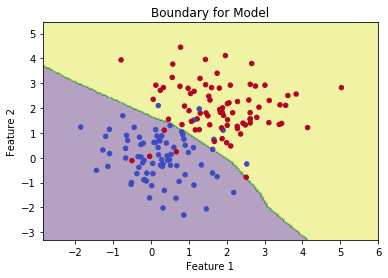

In [28]:
runOnModelAndData(NNModel("simple"), dataTrainGauss, dataTestGauss, labelsTrainGauss, labelsTestGauss)

C:\Users\Jason\Miniconda3\envs\cvxopt-env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Time to fit: 0.4773383140563965
Time to predict 0.0
0.85


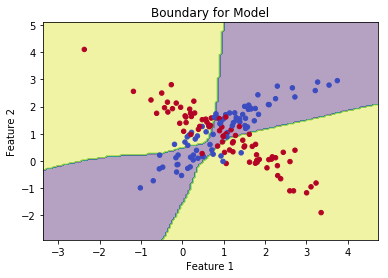

In [29]:
runOnModelAndData(NNModel("simple"), dataTrainCor, dataTestCor, labelsTrainCor, labelsTestCor)

Time to fit: 2.2520995140075684
Time to predict 0.0005004405975341797
0.98875


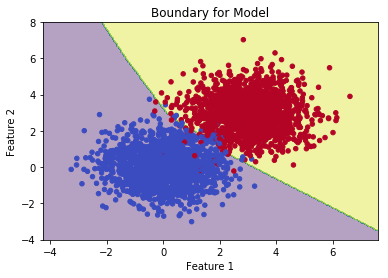

In [30]:
runOnModelAndData(NNModel("simple"), dataTrainLarge, dataTestLarge, labelsTrainLarge, labelsTestLarge)

### Complex Neural Network

Time to fit: 2.849137306213379
Time to predict 0.001001119613647461
0.975


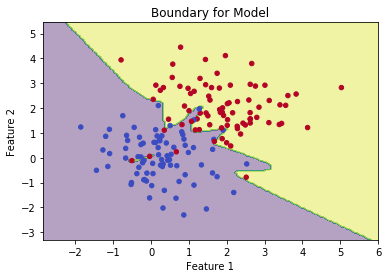

In [31]:
runOnModelAndData(NNModel("complex"), dataTrainGauss, dataTestGauss, labelsTrainGauss, labelsTestGauss)

Time to fit: 1.2774128913879395
Time to predict 0.018513202667236328
0.825


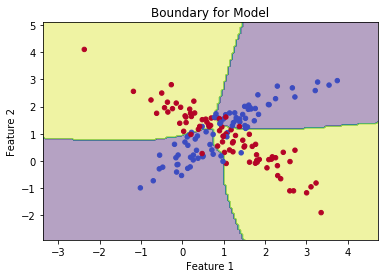

In [32]:
runOnModelAndData(NNModel("complex"), dataTrainCor, dataTestCor, labelsTrainCor, labelsTestCor)

Time to fit: 2.500824213027954
Time to predict 0.01701211929321289
0.99


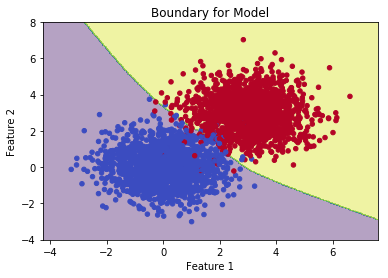

In [33]:
runOnModelAndData(NNModel("complex"), dataTrainLarge, dataTestLarge, labelsTrainLarge, labelsTestLarge)